In [1]:
import pandas as pd
import numpy as np

In [2]:
import os, itertools

In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
x_df, y = (
    pd.DataFrame(boston["data"], columns=boston["feature_names"]),
    boston["target"],
)

In [7]:
x_df = x_df.iloc[:100]

In [8]:
x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
window_size = 1

In [11]:
def training_df_moving_window(df, n=3, factor="b", label_col_name="Label"):

    n_columns = len(df.columns)
    df_without_factor = df.drop(factor)  ####
    if n >= n_columns:
        raise Exception("Window Size is larger than 'n'")
    #     df_without_last_col = df.iloc[:, :-1]
    train_dataset = []

    # moving the windows of size 'n'
    for i in range(n_columns - n):  # len(df_without_last_col.columns)-n + 1
        # train_dataset.append(np.append(df.iloc[:, i:i + n].values.flatten(), df.loc[factor].iloc[i + n]))
        train_dataset.append(
            df_without_factor.iloc[:, i : i + n].values.flatten()
        )  ####

    train_df = pd.DataFrame(train_dataset)

    # Create add name of columns
    train_df_col_names = [
        "_".join(e)
        for e in itertools.product(list(df_without_factor.index), map(str, range(n)))
    ]  ####
    train_df.columns = train_df_col_names

    # Create & add labels column to the last column
    labels_column = df.loc[factor].iloc[range(n, n_columns)].values
    train_df[label_col_name] = labels_column
    #     train_df = train_df.rename(columns = {train_df.columns[-1]:label_col_name})

    return train_df

In [12]:
scaler_model = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler_model.fit_transform(x_df.values), index=x_df.index, columns=x_df.columns
)

In [13]:
scaled_data = scaled_data.transpose()

In [14]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
CRIM,0.000000,0.013066,0.013053,0.016215,0.039048,0.014647,0.051024,0.086044,0.127557,0.101911,...,0.025223,0.020542,0.022228,0.013962,0.022795,0.072032,0.067675,0.071279,0.047028,0.038768
ZN,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.125000,0.125000,...,0.000000,0.000000,0.280000,0.280000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000
INDUS,0.109790,0.442657,0.442657,0.100699,0.100699,0.100699,0.498601,0.498601,0.498601,0.498601,...,0.186713,0.186713,1.000000,1.000000,1.000000,0.150350,0.150350,0.150350,0.150350,0.150350
CHAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,1.000000,0.507143,0.507143,0.428571,0.428571,0.428571,0.900000,0.900000,0.900000,0.900000,...,0.650000,0.650000,0.471429,0.471429,0.471429,0.335714,0.335714,0.335714,0.335714,0.335714
RM,0.440449,0.382772,0.668914,0.598876,0.654682,0.386142,0.229588,0.289513,0.086891,0.226592,...,0.381273,0.376779,0.390637,0.304120,0.318352,0.459176,0.286142,1.000000,0.906742,0.755431
AGE,0.641607,0.782698,0.599382,0.441813,0.528321,0.574665,0.656025,0.959835,1.000000,0.854789,...,0.650875,0.731205,0.522142,0.267765,0.766220,0.565396,0.686921,0.752832,0.350154,0.613800
DIS,0.162768,0.305833,0.305833,0.484456,0.484456,0.484456,0.402623,0.466236,0.487701,0.570888,...,0.000033,0.000000,0.093593,0.093593,0.085291,0.065750,0.065750,0.065750,0.065750,0.065750
RAD,0.000000,0.142857,0.142857,0.285714,0.285714,0.285714,0.571429,0.571429,0.571429,0.571429,...,0.142857,0.142857,0.428571,0.428571,0.428571,0.142857,0.142857,0.142857,0.142857,0.142857
TAX,0.316206,0.102767,0.102767,0.023715,0.023715,0.023715,0.375494,0.375494,0.375494,0.375494,...,0.213439,0.213439,0.213439,0.213439,0.213439,0.237154,0.237154,0.237154,0.237154,0.237154


In [15]:
factor = "LSTAT"

In [16]:
slided_df = training_df_moving_window(scaled_data, n=window_size, factor=factor)

In [17]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(slided_df.iloc[:, :-1], slided_df.iloc[:, -1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
slided_df

,CRIM_0,ZN_0,INDUS_0,CHAS_0,NOX_0,RM_0,AGE_0,DIS_0,RAD_0,TAX_0,PTRATIO_0,B_0,Label
0,0.000000,0.180,0.109790,0.0,1.000000,0.440449,0.641607,0.162768,0.000000,0.316206,0.033333,1.000000,0.248352
1,0.013066,0.000,0.442657,0.0,0.507143,0.382772,0.782698,0.305833,0.142857,0.102767,0.450000,1.000000,0.071106
2,0.013053,0.000,0.442657,0.0,0.507143,0.668914,0.599382,0.305833,0.142857,0.102767,0.450000,0.975228,0.033299
3,0.016215,0.000,0.100699,0.0,0.428571,0.598876,0.441813,0.484456,0.285714,0.023715,0.600000,0.986184,0.116198
4,0.039048,0.000,0.100699,0.0,0.428571,0.654682,0.528321,0.484456,0.285714,0.023715,0.600000,1.000000,0.112036
5,0.014647,0.000,0.100699,0.0,0.428571,0.386142,0.574665,0.484456,0.285714,0.023715,0.600000,0.983080,0.362470
6,0.051024,0.125,0.498601,0.0,0.900000,0.229588,0.656025,0.402623,0.571429,0.375494,0.016667,0.992088,0.595560
7,0.086044,0.125,0.498601,0.0,0.900000,0.289513,0.959835,0.466236,0.571429,0.375494,0.016667,1.000000,0.969476
8,0.127557,0.125,0.498601,0.0,0.900000,0.086891,1.000000,0.487701,0.571429,0.375494,0.016667,0.937492,0.524454
9,0.101911,0.125,0.498601,0.0,0.900000,0.226592,0.854789,0.570888,0.571429,0.375494,0.016667,0.937979,0.640652


In [19]:
feature_importance = rf_model.feature_importances_

aggregated = feature_importance


# # create series
#

# # remove the factor itself
# # aggregated_series.drop(factor, inplace=True)

# # select entries satisfying condition x > std + mean
# selected_factors = aggregated_series[aggregated_series >= (aggregated_series.mean() + aggregated_series.std())]
# # print(selected_factors.sort_values(ascending=False))

# selected_factors = selected_factors.sort_values(ascending=False)[:10]
# # print(selected_factors.sort_values(ascending=False))
# # exit()

# # normalize such that sum up to 1
# normalized_selected_factors = selected_factors / selected_factors.sum()

# # round to 5 decimal points
# rounded_normalized_selected_factors = normalized_selected_factors.round(5)

# # print(normalized_normalized_selected_factors.sum())
# normalized_selected_factors_dict = dict(rounded_normalized_selected_factors)

In [20]:
# sum each n element
if window_size > 1:
    aggregated = np.add.reduceat(
        feature_importance, np.arange(0, len(feature_importance), window_size)
    )

In [21]:
aggregated

array([0.25061015, 0.00685459, 0.02393458, 0.        , 0.13776053,
       0.1643304 , 0.24740817, 0.05983698, 0.01367113, 0.0207722 ,
       0.0220812 , 0.05274006])

In [22]:
slided_df

,CRIM_0,ZN_0,INDUS_0,CHAS_0,NOX_0,RM_0,AGE_0,DIS_0,RAD_0,TAX_0,PTRATIO_0,B_0,Label
0,0.000000,0.180,0.109790,0.0,1.000000,0.440449,0.641607,0.162768,0.000000,0.316206,0.033333,1.000000,0.248352
1,0.013066,0.000,0.442657,0.0,0.507143,0.382772,0.782698,0.305833,0.142857,0.102767,0.450000,1.000000,0.071106
2,0.013053,0.000,0.442657,0.0,0.507143,0.668914,0.599382,0.305833,0.142857,0.102767,0.450000,0.975228,0.033299
3,0.016215,0.000,0.100699,0.0,0.428571,0.598876,0.441813,0.484456,0.285714,0.023715,0.600000,0.986184,0.116198
4,0.039048,0.000,0.100699,0.0,0.428571,0.654682,0.528321,0.484456,0.285714,0.023715,0.600000,1.000000,0.112036
5,0.014647,0.000,0.100699,0.0,0.428571,0.386142,0.574665,0.484456,0.285714,0.023715,0.600000,0.983080,0.362470
6,0.051024,0.125,0.498601,0.0,0.900000,0.229588,0.656025,0.402623,0.571429,0.375494,0.016667,0.992088,0.595560
7,0.086044,0.125,0.498601,0.0,0.900000,0.289513,0.959835,0.466236,0.571429,0.375494,0.016667,1.000000,0.969476
8,0.127557,0.125,0.498601,0.0,0.900000,0.086891,1.000000,0.487701,0.571429,0.375494,0.016667,0.937492,0.524454
9,0.101911,0.125,0.498601,0.0,0.900000,0.226592,0.854789,0.570888,0.571429,0.375494,0.016667,0.937979,0.640652


In [23]:
x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [24]:
aggregated_series = pd.Series(aggregated, index=x_df.transpose().drop(factor).index)

In [25]:
aggregated_series

CRIM       0.250610
ZN         0.006855
INDUS      0.023935
CHAS       0.000000
NOX        0.137761
RM         0.164330
AGE        0.247408
DIS        0.059837
RAD        0.013671
TAX        0.020772
PTRATIO    0.022081
B          0.052740
dtype: float64

In [26]:
boston["DESCR"]

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [27]:
def find_feature_importance(x_df, factor):
    rf_model_path = self.rf_model_path

    # load the model
    rf_model = self.load_model(path=rf_model_path)

    window_size = config.RF_IMPORTANCE.get("window_size", 2)

    # if we have not create a model yet
    if rf_model is None:
        scaled_data = self.scale_data(kind="z-score")

        slided_df = training_df_moving_window(scaled_data, n=window_size, factor=factor)

        rf_model = self.create_update_rf_importance_model(
            x=slided_df.iloc[:, :-1],
            y=slided_df.iloc[:, -1],
            persist_model=True,
            random_state=0,
            n_estimators=config.RF_IMPORTANCE.get("n_estimators", 100),
        )
    self.rf_model = rf_model
    feature_importance = rf_model.feature_importances_

    aggregated = feature_importance

    # sum each n element
    if window_size > 1:
        aggregated = np.add.reduceat(
            feature_importance, np.arange(0, len(feature_importance), window_size)
        )

    # create series
    aggregated_series = pd.Series(aggregated, index=x_df.drop(factor).index)

    # remove the factor itself
    # aggregated_series.drop(factor, inplace=True)

    # select entries satisfying condition x > std + mean
    selected_factors = aggregated_series[
        aggregated_series >= (aggregated_series.mean() + aggregated_series.std())
    ]
    # print(selected_factors.sort_values(ascending=False))

    selected_factors = selected_factors.sort_values(ascending=False)[:10]
    # print(selected_factors.sort_values(ascending=False))
    # exit()

    # normalize such that sum up to 1
    normalized_selected_factors = selected_factors / selected_factors.sum()

    # round to 5 decimal points
    rounded_normalized_selected_factors = normalized_selected_factors.round(5)

    # print(normalized_normalized_selected_factors.sum())
    normalized_selected_factors_dict = dict(rounded_normalized_selected_factors)

    return selected_factors

In [28]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
CRIM       100 non-null float64
ZN         100 non-null float64
INDUS      100 non-null float64
CHAS       100 non-null float64
NOX        100 non-null float64
RM         100 non-null float64
AGE        100 non-null float64
DIS        100 non-null float64
RAD        100 non-null float64
TAX        100 non-null float64
PTRATIO    100 non-null float64
B          100 non-null float64
LSTAT      100 non-null float64
dtypes: float64(13)
memory usage: 10.2 KB


In [29]:
x_df["CRIM"].value_counts()

0.15876    1
0.14455    1
0.07151    1
0.05302    1
0.21124    1
0.05735    1
1.35472    1
0.22927    1
0.63796    1
0.09164    1
0.11027    1
0.05059    1
0.18836    1
0.08014    1
0.03932    1
0.02055    1
0.12650    1
0.05646    1
0.12204    1
0.12269    1
0.01360    1
1.23247    1
0.08873    1
0.09512    1
0.25387    1
0.07896    1
0.67191    1
0.02763    1
0.84054    1
0.04337    1
          ..
0.04684    1
0.03359    1
0.08387    1
0.12744    1
0.19539    1
0.10328    1
0.62739    1
0.08829    1
0.13554    1
0.10153    1
0.03659    1
0.75026    1
0.04379    1
0.08826    1
0.85204    1
1.15172    1
0.72580    1
0.62976    1
0.09378    1
0.05188    1
0.98843    1
0.01951    1
0.80271    1
0.03237    1
0.09744    1
0.14150    1
0.02729    1
0.04203    1
0.04462    1
0.06417    1
Name: CRIM, Length: 100, dtype: int64

In [30]:
x_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.283301,12.385000,6.668700,0.0,0.471321,6.234410,56.252000,5.177271,3.960000,289.490000,18.69000,385.301500,10.772900
std,0.389102,22.966802,3.162352,0.0,0.046836,0.490838,27.476787,1.412076,1.392041,45.922089,1.69893,27.386937,5.700031
min,0.006320,0.000000,0.740000,0.0,0.398000,5.399000,2.900000,3.092100,1.000000,216.000000,15.10000,232.600000,1.980000
25%,0.050395,0.000000,4.490000,0.0,0.437000,5.926250,35.225000,4.042225,3.000000,252.000000,17.90000,386.740000,6.702500
50%,0.102405,0.000000,6.910000,0.0,0.453000,6.130500,57.300000,4.990600,4.000000,284.000000,18.70000,394.395000,9.465000
75%,0.221050,18.750000,8.140000,0.0,0.524000,6.433000,81.775000,6.067175,4.250000,307.000000,19.70000,396.900000,13.315000
max,1.612820,100.000000,15.040000,0.0,0.538000,8.069000,100.000000,9.222900,8.000000,469.000000,21.10000,396.900000,30.810000


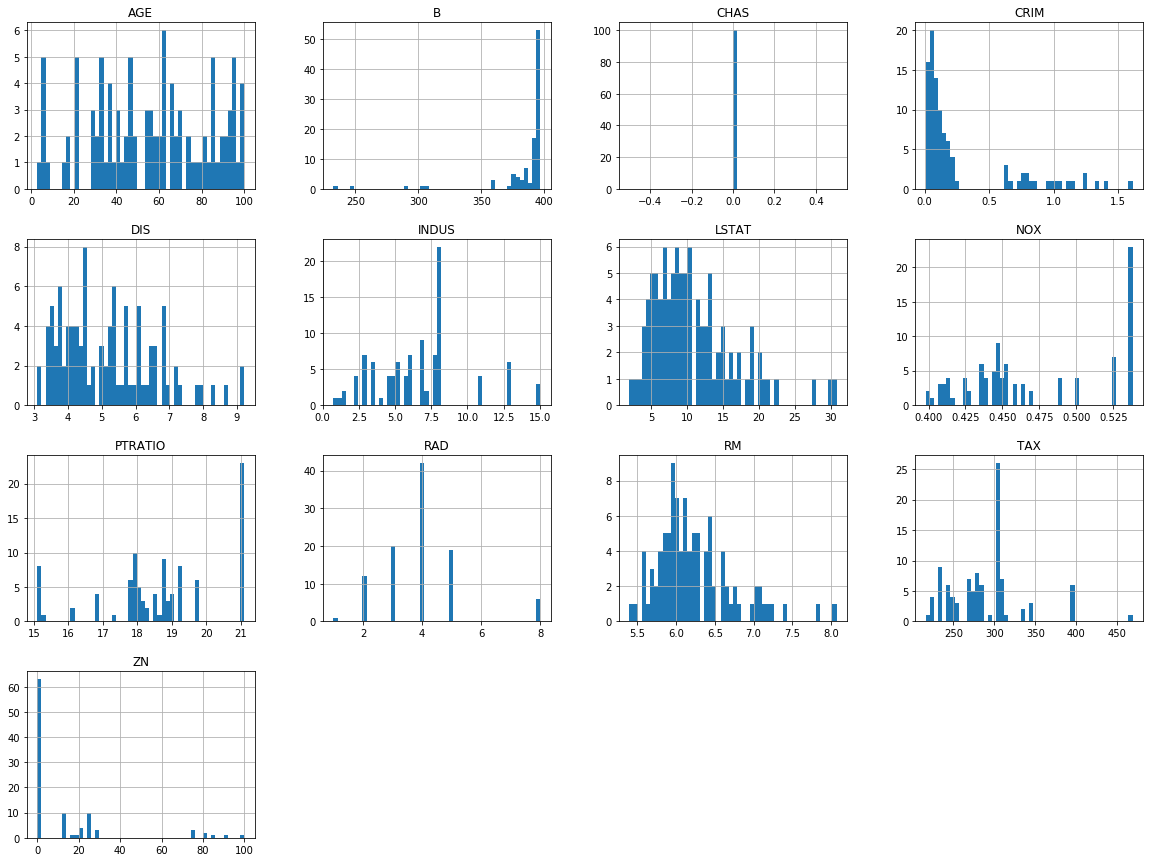

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

x_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [32]:
import hashlib


def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [33]:
housing_with_id = x_df.reset_index()  # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [34]:
train_set

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
6,6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
10,10,0.22489,12.5,7.87,0.0,0.5240,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
12,12,0.09378,12.5,7.87,0.0,0.5240,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71


In [35]:
x_df["TAX"]

0     296.0
1     242.0
2     242.0
3     222.0
4     222.0
5     222.0
6     311.0
7     311.0
8     311.0
9     311.0
10    311.0
11    311.0
12    311.0
13    307.0
14    307.0
15    307.0
16    307.0
17    307.0
18    307.0
19    307.0
20    307.0
21    307.0
22    307.0
23    307.0
24    307.0
25    307.0
26    307.0
27    307.0
28    307.0
29    307.0
      ...  
70    305.0
71    305.0
72    305.0
73    305.0
74    398.0
75    398.0
76    398.0
77    398.0
78    398.0
79    398.0
80    281.0
81    281.0
82    281.0
83    281.0
84    247.0
85    247.0
86    247.0
87    247.0
88    270.0
89    270.0
90    270.0
91    270.0
92    270.0
93    270.0
94    270.0
95    276.0
96    276.0
97    276.0
98    276.0
99    276.0
Name: TAX, Length: 100, dtype: float64

In [36]:
x_df["TAX_cat"] = np.ceil(x_df["TAX"] / 100)

In [37]:
x_df["TAX"]

0     296.0
1     242.0
2     242.0
3     222.0
4     222.0
5     222.0
6     311.0
7     311.0
8     311.0
9     311.0
10    311.0
11    311.0
12    311.0
13    307.0
14    307.0
15    307.0
16    307.0
17    307.0
18    307.0
19    307.0
20    307.0
21    307.0
22    307.0
23    307.0
24    307.0
25    307.0
26    307.0
27    307.0
28    307.0
29    307.0
      ...  
70    305.0
71    305.0
72    305.0
73    305.0
74    398.0
75    398.0
76    398.0
77    398.0
78    398.0
79    398.0
80    281.0
81    281.0
82    281.0
83    281.0
84    247.0
85    247.0
86    247.0
87    247.0
88    270.0
89    270.0
90    270.0
91    270.0
92    270.0
93    270.0
94    270.0
95    276.0
96    276.0
97    276.0
98    276.0
99    276.0
Name: TAX, Length: 100, dtype: float64

In [38]:
x_df["TAX_cat"].value_counts()

3.0    54
4.0    45
5.0     1
Name: TAX_cat, dtype: int64

In [39]:
x_df["TAX_cat"].where(x_df["TAX_cat"] < 8, 7, inplace=True)

In [40]:
x_df["TAX_cat"].value_counts()

3.0    54
4.0    45
5.0     1
Name: TAX_cat, dtype: int64

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

In [42]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(x_df, x_df["TAX_cat"]):
    print(train_index)
    strat_train_set = x_df.loc[train_index]
    strat_test_set = x_df.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
x_df["TAX_cat"].value_counts() / len(x_df)

In [ ]:
strat_test_set["TAX_cat"].value_counts() / len(strat_test_set)

In [ ]:
strat_train_set["TAX_cat"].value_counts() / len(strat_train_set)

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.plot(kind="scatter", x="AGE", y="LSTAT", alpha=0.4)

In [ ]:
housing.plot(
    kind="scatter",
    x="AGE",
    y="LSTAT",
    alpha=0.4,
    s=y,
    label="y",
    figsize=(10, 7),
    c="AGE",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()

In [ ]:
pd.tools.plotting.scatter_matrix(housing, figsize=(12, 8))
plt.show()